In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_json('Data/train.json')
test = pd.read_json('Data/test.json')

In [3]:
print(train.shape)
print(test.shape)

(1604, 5)
(8424, 4)


In [4]:
all_df = pd.concat([train, test])
print(all_df.shape)

(10028, 5)


In [5]:
all_df.drop('id', axis=1, inplace=True)
print(all_df.shape)

(10028, 4)


In [6]:
all_df['inc_angle'] = pd.to_numeric(all_df['inc_angle'],errors='coerce')

In [7]:
print('max. inc_angle:', all_df['inc_angle'].max())
print('min. inc_angle:', all_df['inc_angle'].min())
print('avg. inc_angle:', all_df['inc_angle'].mean())

max. inc_angle: 50.66178518
min. inc_angle: 23.0805
avg. inc_angle: 40.02188346578265


In [8]:
all_df['inc_angle'].fillna(value=all_df['inc_angle'].mean(), inplace=True)
print(all_df['inc_angle'].isnull().sum())

0


In [9]:
all_df.reset_index(inplace =True, drop=True)

## Get Global Statistics

In [10]:
def get_stats(label=1):
    global all_df
    all_df['max'+str(label)] = [np.max(np.array(x)) for x in all_df['band_'+str(label)] ]
    all_df['min'+str(label)] = [np.min(np.array(x)) for x in all_df['band_'+str(label)] ]
    all_df['med'+str(label)] = [np.median(np.array(x)) for x in all_df['band_'+str(label)] ]
    all_df['std'+str(label)] = [np.std(np.array(x)) for x in all_df['band_'+str(label)] ]
    all_df['mean'+str(label)] = [np.mean(np.array(x)) for x in all_df['band_'+str(label)] ]
    all_df['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in all_df['band_'+str(label)] ]
    all_df['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in all_df['band_'+str(label)] ]
    all_df['mid50_'+str(label)] = all_df['p75_'+str(label)]-all_df['p25_'+str(label)]
    all_df.drop(['p25_'+str(label), 'p75_'+str(label)], axis=1, inplace=True)
    
    
    return all_df

all_df = get_stats(1)
all_df = get_stats(2)

## Plot the min\max\med\std\mid_50 distributions

In [11]:
def plot_var(df, name, nbins=50):
    minval = df[name].min()
    maxval = df[name].max()
    print("Attr: {}, min={:2.3f}, max={:2.3f}".format(name, minval, maxval))
    
    plt.hist(df.loc[:,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.5)
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.show()

Attr: min1, min=-45.681, max=-17.629


C:\Users\khyeh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


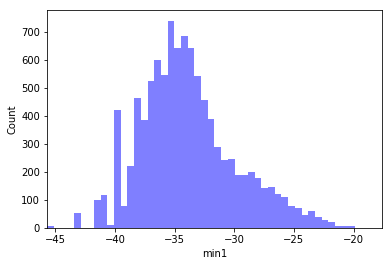

Attr: max1, min=-21.834, max=37.091


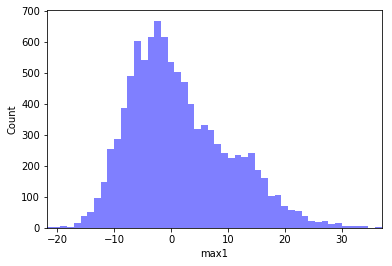

Attr: std1, min=1.886, max=10.321


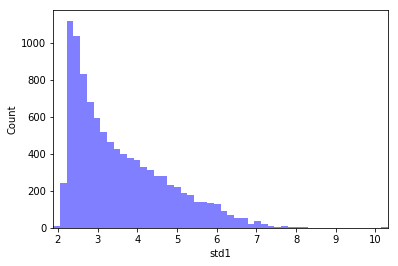

Attr: med1, min=-31.616, max=-8.378


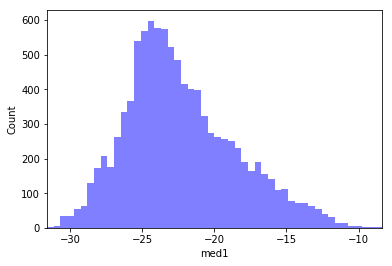

Attr: mean1, min=-31.943, max=-8.247


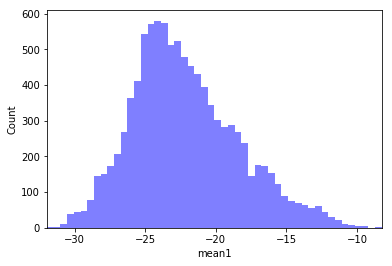

Attr: mid50_1, min=2.244, max=14.287


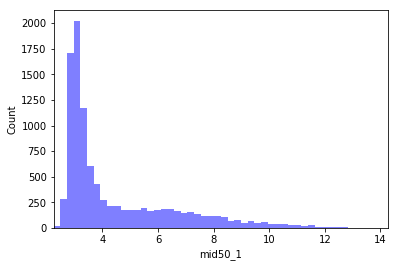

In [12]:
for col in ['min1','max1','std1','med1','mean1','mid50_1']:
    plot_var(all_df, col)

Attr: min2, min=-49.084, max=-29.577


C:\Users\khyeh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


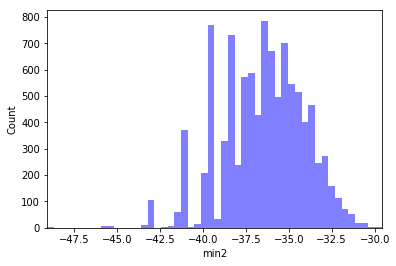

Attr: max2, min=-25.308, max=37.091


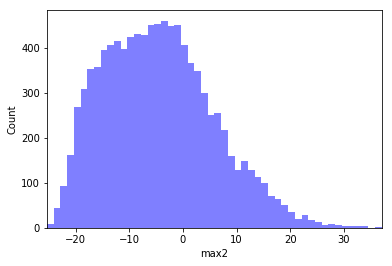

Attr: std2, min=1.705, max=10.246


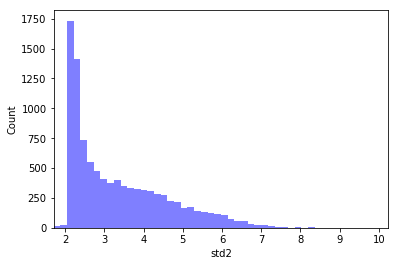

Attr: med2, min=-31.615, max=-11.444


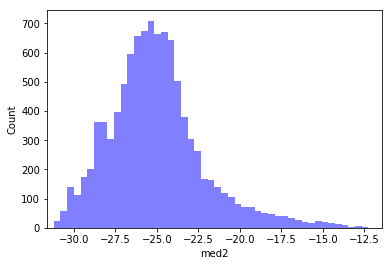

Attr: mean2, min=-31.662, max=-13.718


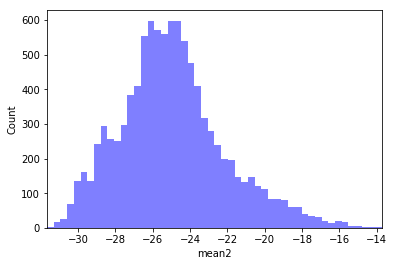

Attr: mid50_2, min=1.996, max=14.394


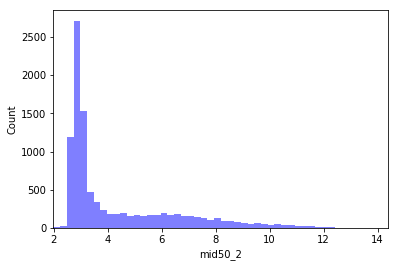

In [13]:
for col in ['min2','max2','std2','med2','mean2','mid50_2']:
    plot_var(all_df, col)

## Create the band 3: HH/HV: Reference https://www.kaggle.com/keremt/getting-color-composites

In [17]:
band3_arr = []
for i, row in all_df.iterrows():
    band_1 = np.array(row['band_1'])
    band_2 = np.array(row['band_2'])
    band_3 = band_1 / band_2
    band3_arr.append(band_3)
    
all_df['band_3'] =  [band_3 for band3 in band3_arr]
all_df = get_stats(3)

In [18]:
print(all_df.head(3))

                                              band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   

                                              band_2  inc_angle  is_iceberg  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...    43.9239         0.0   
1  [-31.506321, -27.984554, -26.645678, -23.76760...    38.1562         0.0   
2  [-24.870956, -24.092632, -20.653963, -19.41104...    45.2859         1.0   

        max1       min1       med1      std1      mean1   mid50_1   ...     \
0  -0.213149 -38.211376 -27.879921  2.764537 -27.911043  3.051990   ...      
1  12.570409 -23.125309 -13.654199  3.142532 -13.566554  3.205581   ...      
2  -9.918477 -33.391197 -22.935019  2.223905 -23.053698  3.070210   ...      

       std2      mean2   mid50_2  \
0  2.381284 -29.910117  3.323765   
1  2.934098 -25.359106  2.966237   
2  2.125275 -24.839821  2.653834   



In [19]:
print(all_df.columns)

Index(['band_1', 'band_2', 'inc_angle', 'is_iceberg', 'max1', 'min1', 'med1',
       'std1', 'mean1', 'mid50_1', 'max2', 'min2', 'med2', 'std2', 'mean2',
       'mid50_2', 'band_3', 'max3', 'min3', 'med3', 'std3', 'mean3',
       'mid50_3'],
      dtype='object')


## Compose RGB using the global min\max value for band_1\band_2\band_3

* In https://www.kaggle.com/keremt/getting-color-composites, the author used local (one image's own) min\max.
* I would like to use global min\max instead; since within the same band (HH\HV), the dB values in the given data should be related between images and their own incidence angles, use local min\max to normalize might lose some information.

In [20]:
def color_composite(data):
    rgb_arrays = []
    
    band_1_min = data['min1'].min()
    band_1_max = data['max1'].max()
    
    band_2_min = data['min2'].min()
    band_2_max = data['max2'].max()
    
    band_3_min = data['min3'].min()
    band_3_max = data['max3'].max()
    
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = np.array(row['band_3']).reshape(75, 75)

        r = (band_1 - band_1_min) / (band_1_max - band_1_min)
        g = (band_2 - band_2_min) / (band_2_max - band_2_min)
        b = (band_3 - band_3_min) / (band_3_max - band_3_min)

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

In [21]:
rgb_all_df = color_composite(all_df)

In [22]:
rgb_all_df.shape

(10028, 75, 75, 3)

In [23]:
all_df['band_mixed'] = [img for img in rgb_all_df]

In [24]:
print(all_df['band_mixed'][0].shape)

(75, 75, 3)


## Plot figures before normalization

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


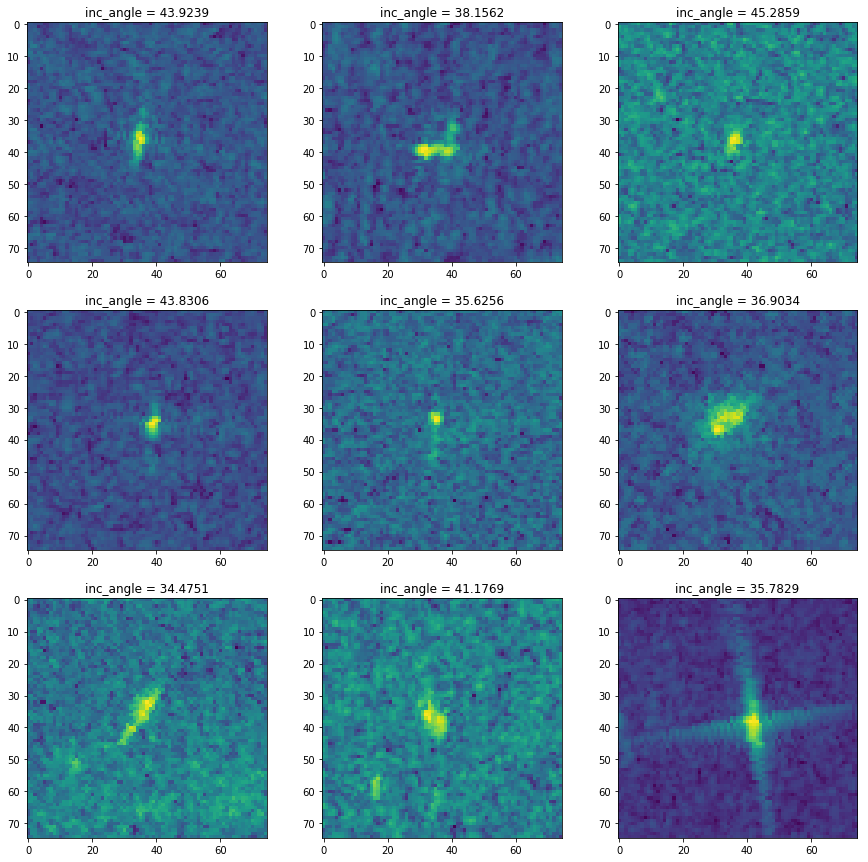

In [25]:
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(all_df.iloc[i,0]),(75,75))
    ax.imshow(arr)
    ax.set_title('inc_angle = ' + str(all_df.ix[i,'inc_angle']))
    
plt.show()

## Plot figures with mixed bands (normalized to 0,1)

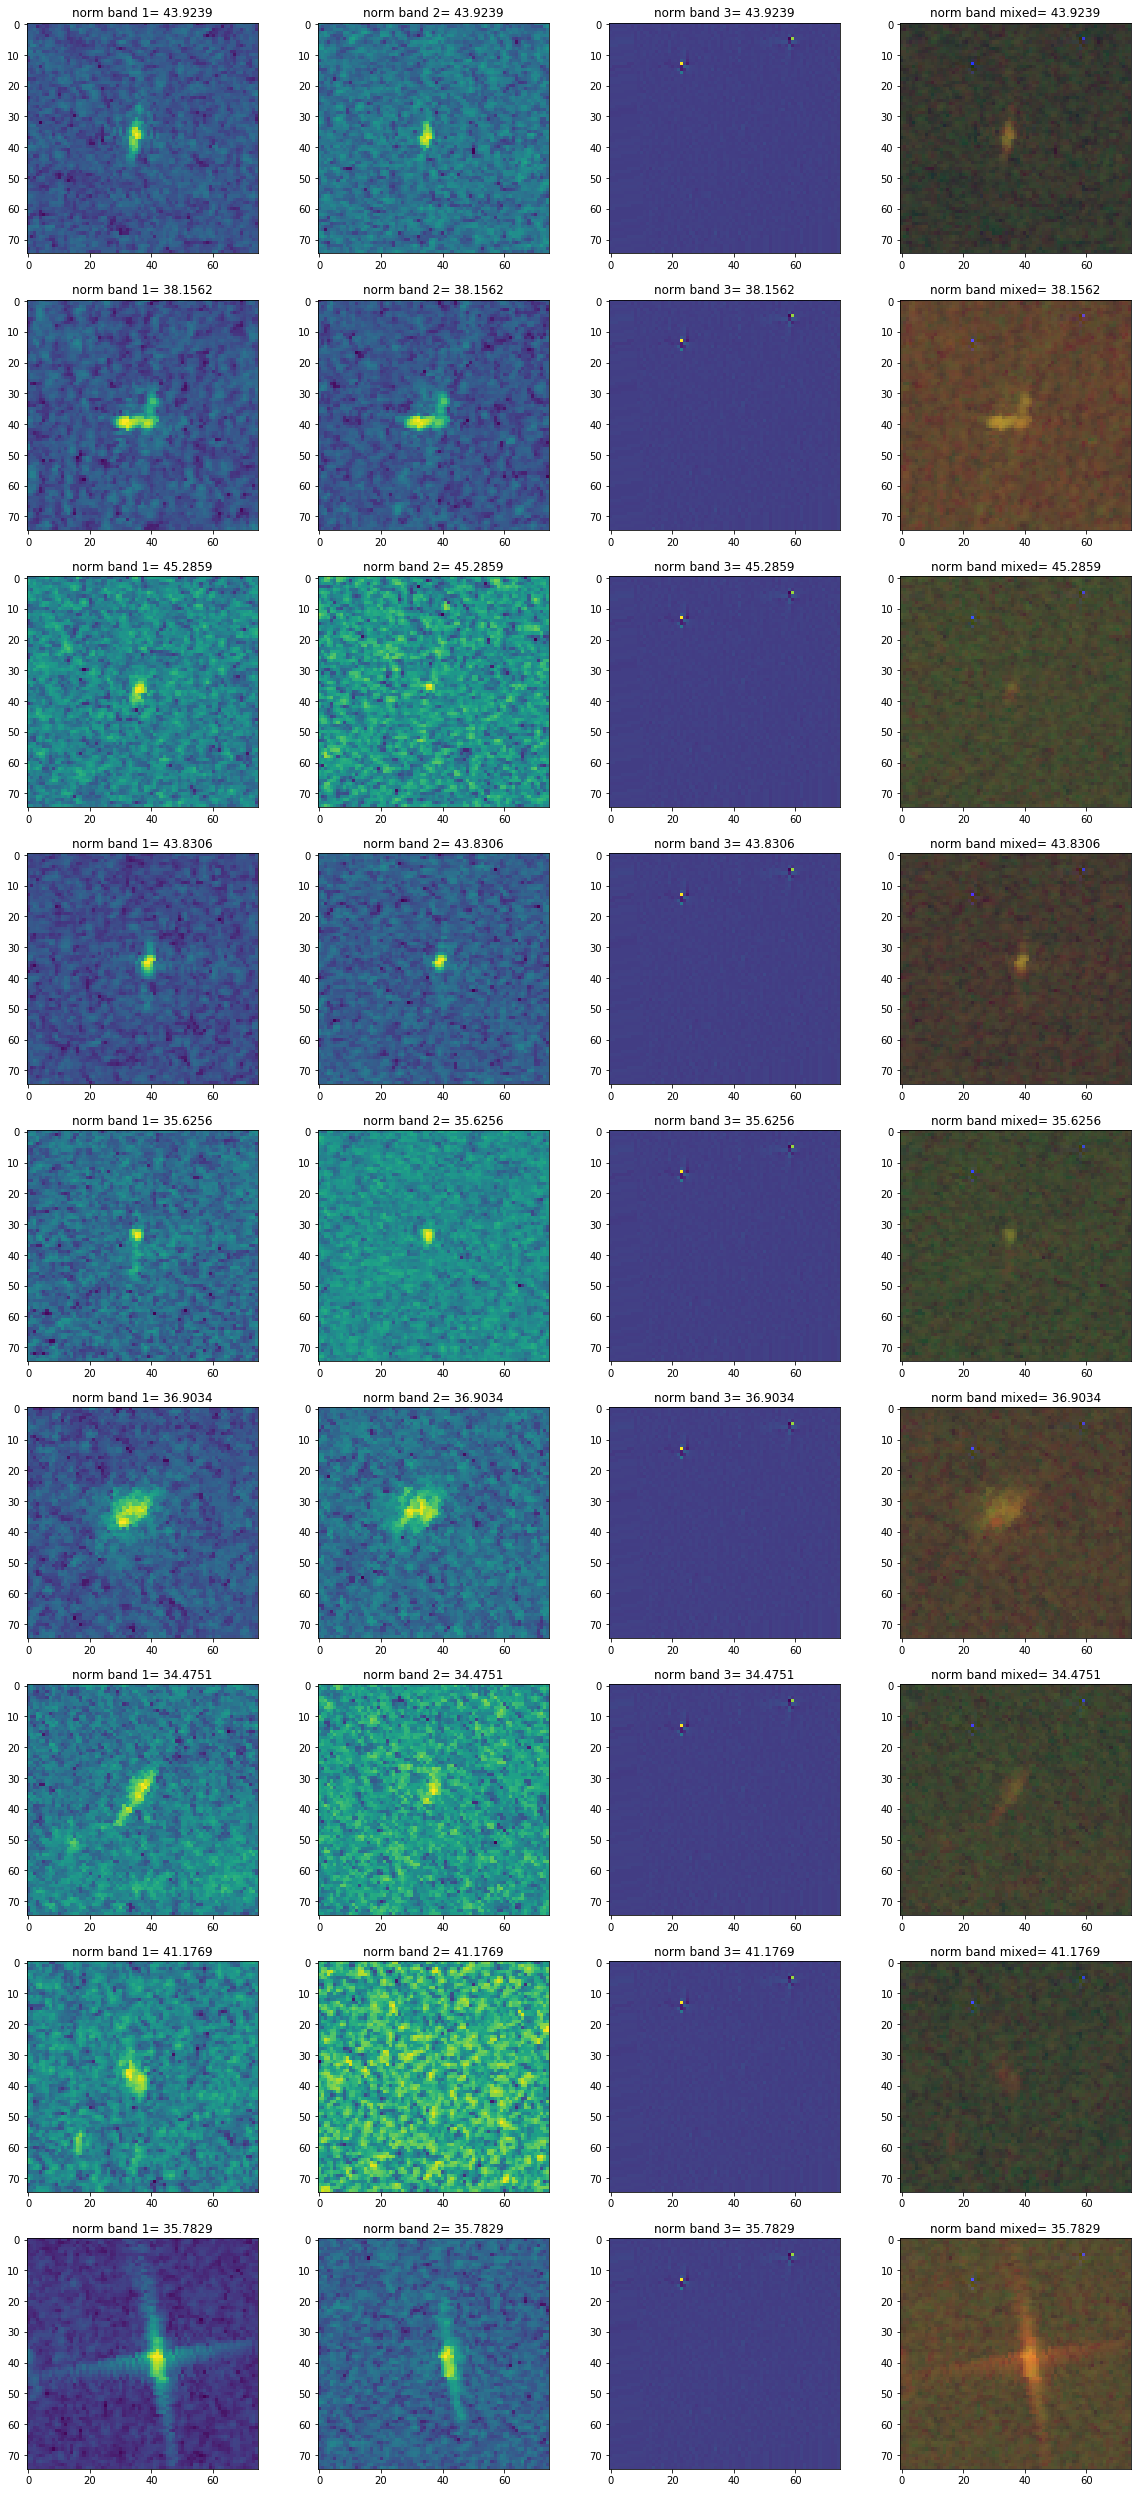

In [26]:
fig = plt.figure(1,figsize=(20,45))
for i in range(9):
    ax = fig.add_subplot(9,4,4*i+1)
    arr = np.reshape(np.array(all_df.ix[i,'band_1']),(75,75))
    ax.imshow(arr)
    ax.set_title('norm band 1= ' + str(all_df.ix[i,'inc_angle']))
    
    ax = fig.add_subplot(9,4,4*i+2)
    arr = np.reshape(np.array(all_df.ix[i,'band_2']),(75,75))
    ax.imshow(arr)
    ax.set_title('norm band 2= ' + str(all_df.ix[i,'inc_angle']))
    
    ax = fig.add_subplot(9,4,4*i+3)
    arr = np.reshape(np.array(all_df.ix[i,'band_3']),(75,75))
    ax.imshow(arr)
    ax.set_title('norm band 3= ' + str(all_df.ix[i,'inc_angle']))
    
    ax = fig.add_subplot(9,4,4*i+4)
    arr = np.reshape(np.array(all_df.ix[i,'band_mixed']),(75,75,3))
    ax.imshow(arr)
    ax.set_title('norm band mixed= ' + str(all_df.ix[i,'inc_angle']))
    
plt.show()

* I found there is always two bright dots in band_3 and band_mixed, and always in the almost the same position, 
* Seems that the background color is almost the same

Which somehow shows the HH\HV normalization is somehow consistent:
* From human perspective, the deep brown colors would be easily recognized as background\ocean.
* From ML perspective, three channels with some specific range of values mean the ocean. 

If we used local min\max instead of global ones of each band to normalize it's own bands images, we could not know the relationship between images. ( Since it's decided by each image's own deviation (noise), where the deviation is different)

## Denoise using common noise filter: http://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html

In [31]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, img_as_ubyte, color
from skimage.util import random_noise

### Testing to show esitmated Gaussian noise of the image

In [32]:
sigma_ests = []
for i in range(9):
    img = all_df.ix[i, 'band_mixed']
    float_img = img_as_float(img)
    
    # Estimate the average noise standard deviation across color channels.
    sigma_est = estimate_sigma(float_img, multichannel=True, average_sigmas=True)
    print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))
    sigma_ests.append(sigma_est)

Estimated Gaussian noise standard deviation = 0.00994497408085841
Estimated Gaussian noise standard deviation = 0.008763881747152738
Estimated Gaussian noise standard deviation = 0.009892028082762343
Estimated Gaussian noise standard deviation = 0.009098600138978041
Estimated Gaussian noise standard deviation = 0.010484346749326386
Estimated Gaussian noise standard deviation = 0.01090040427661128
Estimated Gaussian noise standard deviation = 0.012275896903030312
Estimated Gaussian noise standard deviation = 0.00919890230133962
Estimated Gaussian noise standard deviation = 0.00964812633046744


It seems that the mixed pictures are quite noisy... hmm..., let's try some commonly used denoise filter: denoise_bilateral, which is an edge-preserving, denoising filter. An edges might be very important features for our training

* Bilateral filter : A bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.

sigma estimation => old = 2.53226,	new = 0.42799
sigma estimation => old = 2.21614,	new = 0.41587
sigma estimation => old = 2.51896,	new = 0.37065
sigma estimation => old = 2.32920,	new = 0.36016
sigma estimation => old = 2.67886,	new = 0.42193
sigma estimation => old = 2.74729,	new = 0.41728
sigma estimation => old = 3.13714,	new = 0.44070
sigma estimation => old = 2.39054,	new = 0.41971
sigma estimation => old = 2.46102,	new = 0.45725


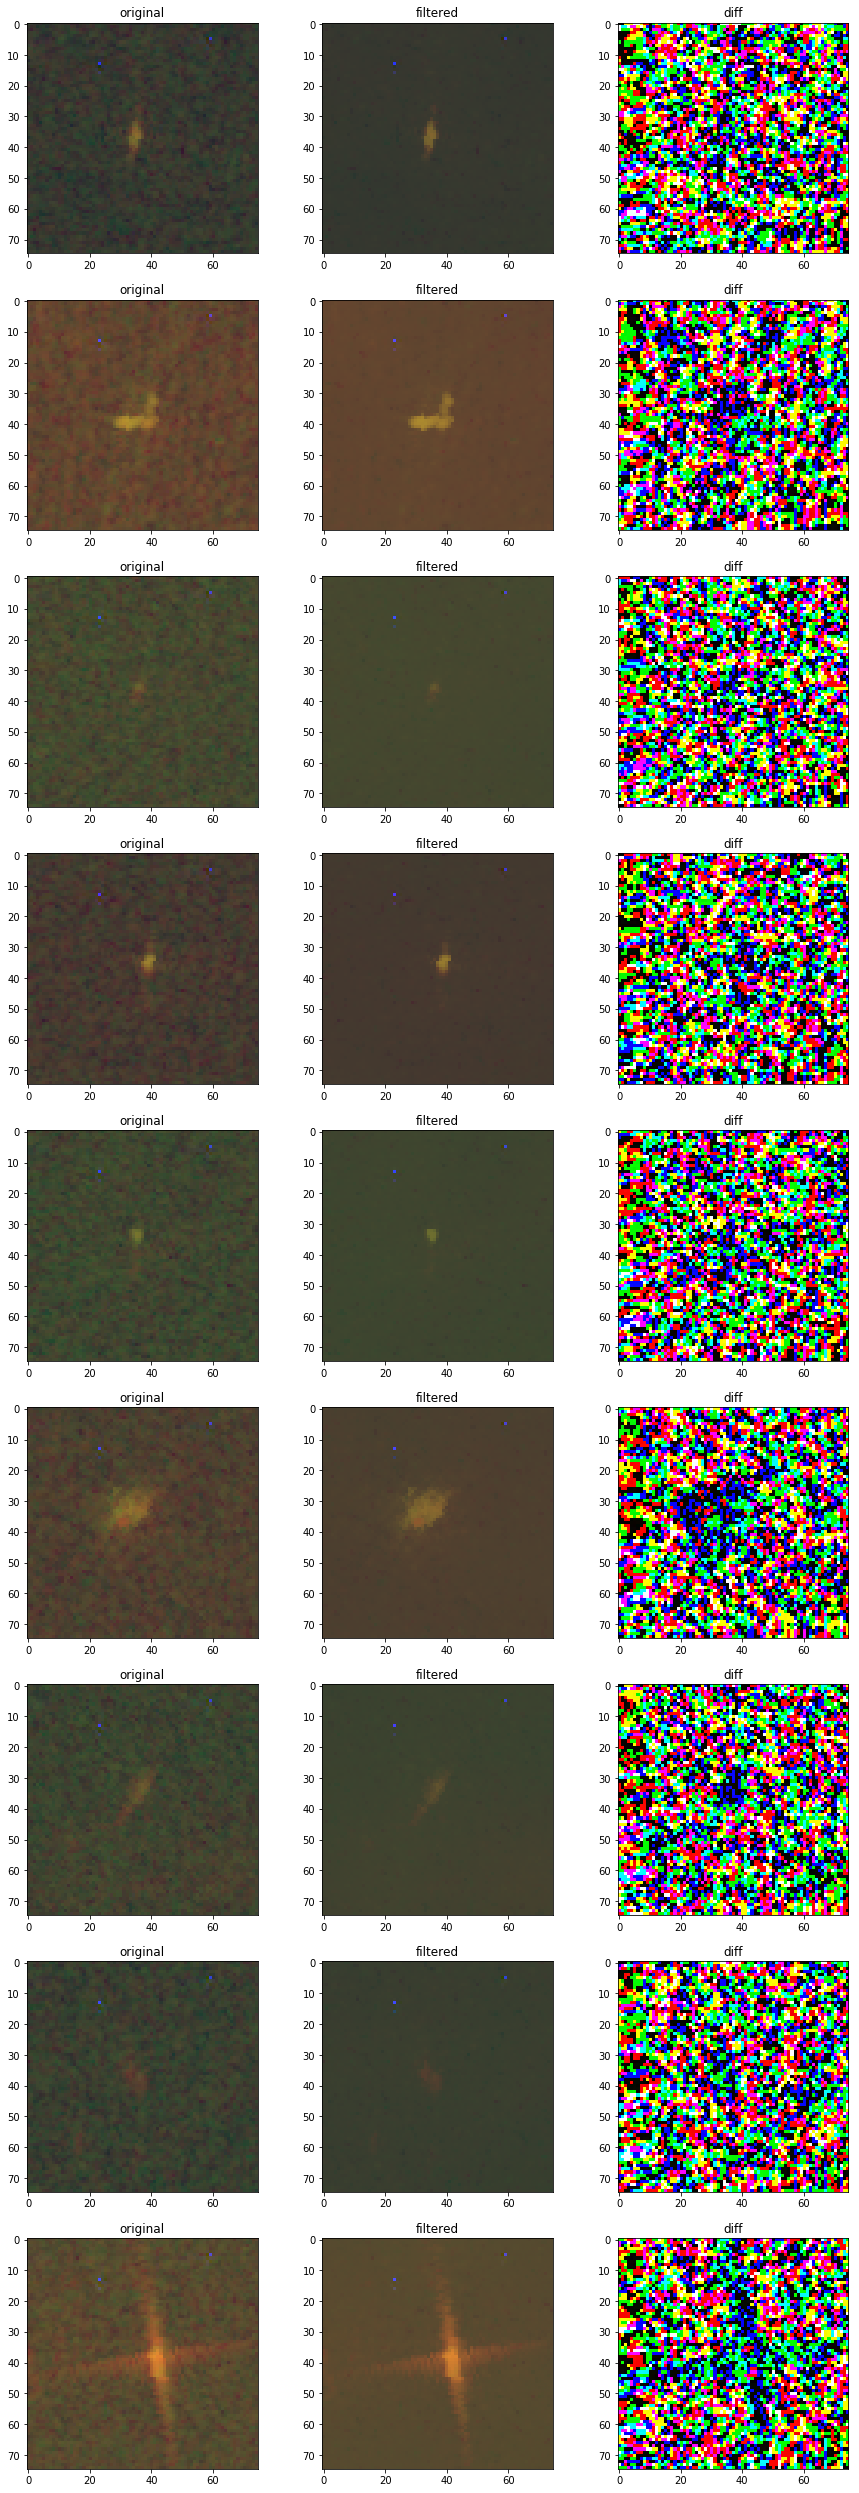

In [37]:
fig = plt.figure(1,figsize=(15,45))
for i in range(9):
    img = np.array(all_df.ix[i, 'band_mixed']).reshape((75,75,3))
    axes = [fig.add_subplot(9,3,3*i+a) for a in range(1,4)]
    
    img *= 255.0
    img = img.astype(np.uint8)
    axes[0].imshow(img)
    axes[0].set_title('original')
    
    denoised_img = denoise_bilateral(img, sigma_color=sigma_ests[i]*.9, sigma_spatial=10, multichannel=True)
    #denoised_img = denoise_tv_chambolle(float_img, weight=0.01, multichannel=True)
    
    denoised_img *= 255.0
    denoised_img = denoised_img.astype(np.uint8)
    axes[1].imshow(denoised_img)
    axes[1].set_title('filtered')
    
    axes[2].imshow(img-denoised_img)
    axes[2].set_title('diff')
    
    sigma_est_old = estimate_sigma(img, multichannel=True, average_sigmas=True)
    sigma_est_new = estimate_sigma(denoised_img, multichannel=True, average_sigmas=True)
    print("sigma estimation => old = {:.5f},\tnew = {:.5f}".format(sigma_est_old, sigma_est_new))

* Note that since we multiply each pixel by 255, you might notice the same picture's estimated deviation is enlarged as well. Yet, they both come up with same image (with minor floating point loss), seems all of them are reduced much the deviation (noise) after bilateral filter have been applied.

### Denoise all band_mixed images

> also transform the image with positive values scaled between 0 and 255

In [ ]:
for i in range(all_df.shape[0]):
    img = np.array(all_df.ix[i, 'band_mixed']).reshape((75,75,3))
    
    sigma_est = estimate_sigma(img, multichannel=True, average_sigmas=True)
    denoised_img = denoise_bilateral(img, sigma_color=sigma_est*.9, sigma_spatial=10, multichannel=True)
    denoised_img *= 255.0
    denoised_img = denoised_img.astype(np.uint8)
    
    all_df.set_value(i, 'band_mixed', denoised_img)
    print("\r{:.2f}% finished                 ".format(i/all_df.shape[0]*100.), end="")

76.79% finished                 

In [ ]:
all_df['band_mixed'].shape

In [ ]:
reserved_df = all_df[['band_mixed', 'inc_angle']]

In [ ]:
processed_train = reserved_df.iloc[:train.shape[0],]
processed_train['is_iceberg'] = train['is_iceberg']
processed_test = reserved_df.iloc[train.shape[0]:,]
processed_test['is_iceberg'] = np.zeros((test.shape[0],))

print(processed_train.shape, processed_test.shape)

In [ ]:
processed_train.to_json('Data/denoised_processed_train.json')
processed_test.to_json('Data/denoised_processed_test.json')

## Conclusion

If we believe that *ONLY* how the object shaped matters, we can use local min\max to normalize a picture into [0,1] in whatever bands. Further more, for data augmentation, we can even exchange three channels data (RGB)